In [ ]:
!pip install tensorflowjs

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import cv2
import pathlib
import os
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.3.0


In [ ]:
Train = '/gdrive/My Drive/SIH_2020/SIH DATASETS/25 crops dataset'
Test = '/gdrive/My Drive/SIH_2020/SIH DATASETS/Test'

In [ ]:
train_labels=[]
for i in os.listdir(Train):  
    if (i.split('_')[0]=='apple'):
        train_labels.append(0)
    elif (i.split('_')[0]=='banana'):
        train_labels.append(1)
    elif (i.split('_')[0]=='beetroot'):
        train_labels.append(2)
    elif (i.split('_')[0])=='cauliflower':
        train_labels.append(3)
    elif (i.split('_')[0])=='coconut':
        train_labels.append(4)
    elif (i.split('_')[0])=='coffee':
        train_labels.append(5)
    elif (i.split('_')[0])=='cotton':
        train_labels.append(6)
    elif (i.split('_')[0])=='cucumber':
        train_labels.append(7)
    elif (i.split('_')[0])=='guava':
        train_labels.append(8)
    elif (i.split('_')[0]=='jute'):
        train_labels.append(9)
    elif (i.split('_')[0]=='lemon'):
        train_labels.append(10)
    elif (i.split('_')[0])=='maize':
        train_labels.append(11)
    elif (i.split('_')[0])=='millet':
        train_labels.append(12)
    elif (i.split('_')[0])=='onion':
        train_labels.append(13)
    elif (i.split('_')[0])=='orange':
        train_labels.append(14)
    elif (i.split('_')[0])=='paddy':
        train_labels.append(15)
    elif (i.split('_')[0])=='peas':
        train_labels.append(16)
    elif (i.split('_')[0]=='pineapple'):
        train_labels.append(17)
    elif (i.split('_')[0]=='potato'):
        train_labels.append(18)
    elif (i.split('_')[0])=='red':
        train_labels.append(19)
    elif (i.split('_')[0])=='sugarcane':
        train_labels.append(20)
    elif (i.split('_')[0])=='sunflower':
        train_labels.append(21)
    elif (i.split('_')[0])=='tomato':
        train_labels.append(22)
    elif (i.split('_')[0])=='watermelon':
        train_labels.append(23)
    elif (i.split('_')[0])=='wheat':
        train_labels.append(24)

test_labels=[]
for i in os.listdir(Test):  
    if (i.split('_')[0]=='apple'):
        test_labels.append(0)
    elif (i.split('_')[0]=='banana'):
        test_labels.append(1)
    elif (i.split('_')[0]=='beetroot'):
        test_labels.append(2)
    elif (i.split('_')[0])=='cauliflower':
        test_labels.append(3)
    elif (i.split('_')[0])=='coconut':
        test_labels.append(4)
    elif (i.split('_')[0])=='coffee':
        test_labels.append(5)
    elif (i.split('_')[0])=='cotton':
        test_labels.append(6)
    elif (i.split('_')[0])=='cucumber':
        test_labels.append(7)
    elif (i.split('_')[0])=='guava':
        test_labels.append(8)
    elif (i.split('_')[0]=='jute'):
        test_labels.append(9)
    elif (i.split('_')[0]=='lemon'):
        test_labels.append(10)
    elif (i.split('_')[0])=='maize':
        test_labels.append(11)
    elif (i.split('_')[0])=='millet':
        test_labels.append(12)
    elif (i.split('_')[0])=='onion':
        test_labels.append(13)
    elif (i.split('_')[0])=='orange':
        test_labels.append(14)
    elif (i.split('_')[0])=='paddy':
        test_labels.append(15)
    elif (i.split('_')[0])=='peas':
        test_labels.append(16)
    elif (i.split('_')[0]=='pineapple'):
        test_labels.append(17)
    elif (i.split('_')[0]=='potato'):
        test_labels.append(18)
    elif (i.split('_')[0])=='red':
        test_labels.append(19)
    elif (i.split('_')[0])=='sugarcane':
        test_labels.append(20)
    elif (i.split('_')[0])=='sunflower':
        test_labels.append(21)
    elif (i.split('_')[0])=='tomato':
        test_labels.append(22)
    elif (i.split('_')[0])=='watermelon':
        test_labels.append(23)
    elif (i.split('_')[0])=='wheat':
        test_labels.append(24)

print(len(train_labels))
print(len(test_labels))

9520
1690


In [ ]:
from tqdm import tqdm

train_images=[]
for i in tqdm (os.listdir(Train)):
    path = os.path.join(Train,i)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(100,100))
    train_images.append(img)


test_images=[]
for i in tqdm (os.listdir(Test)):
    path = os.path.join(Test,i)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(100,100))
    test_images.append(img)


100%|██████████| 1690/1690 [00:05<00:00, 318.97it/s]


In [ ]:

train_images = np.array(train_images).reshape(-1, 100, 100, 3)
train_images = train_images.astype('float32') / 255

test_images = np.array(test_images).reshape(-1, 100, 100, 3)
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(9520, 100, 100, 3)
(9520, 25)
(1690, 100, 100, 3)
(1690, 25)


**CNN MODEL DEVELOPMENT**

In [ ]:
# Building convolutional network

model = tf.keras.models.Sequential()

# 1st CONV LAYER
model.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu',input_shape=(100,100,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#2nd CONV LAYER
model.add(tf.keras.layers.Conv2D(32,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#3rd CONV LAYER
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu')) 
model.add(tf.keras.layers.Dense(128,activation='relu')) 
model.add(tf.keras.layers.Dense(25, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,batch_size = 100, epochs=15)

Epoch 1/15
96/96 [==============================] - 119s 1s/step - loss: 1.4866 - accuracy: 0.5561
Epoch 2/15
96/96 [==============================] - 116s 1s/step - loss: 0.7299 - accuracy: 0.7675
Epoch 3/15
96/96 [==============================] - 113s 1s/step - loss: 0.6334 - accuracy: 0.7923
Epoch 4/15
96/96 [==============================] - 112s 1s/step - loss: 0.5599 - accuracy: 0.8138
Epoch 5/15
96/96 [==============================] - 110s 1s/step - loss: 0.5027 - accuracy: 0.8339
Epoch 6/15
96/96 [==============================] - 109s 1s/step - loss: 0.4758 - accuracy: 0.8429
Epoch 7/15
96/96 [==============================] - 108s 1s/step - loss: 0.4116 - accuracy: 0.8637
Epoch 8/15
96/96 [==============================] - 107s 1s/step - loss: 0.3484 - accuracy: 0.8837
Epoch 9/15
96/96 [==============================] - 108s 1s/step - loss: 0.3103 - accuracy: 0.8973
Epoch 10/15
96/96 [==============================] - 112s 1s/step - loss: 0.2319 - accuracy: 0.9275
Epoch 11/

In [ ]:
# VALIDATION

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

53/53 [==============================] - 6s 121ms/step - loss: 0.0576 - accuracy: 0.9781
Test accuracy: 0.9781064987182617


In [ ]:
# TESTING

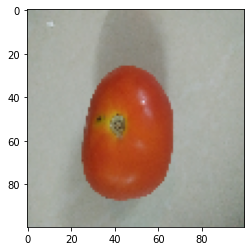

In [ ]:
loc = '/gdrive/My Drive/SIH_2020/SIH DATASETS/tomato1.jpg'
img = cv2.imread(loc)
img = cv2.resize(img,(100,100))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [ ]:
from PIL import Image,ImageFilter  
#Read image
im = Image.open('/gdrive/My Drive/SIH_2020/SIH DATASETS/tomato1.jpg')
#Display image  
im.show()
   
from PIL import ImageEnhance  
enh = ImageEnhance.Contrast(img)  
enh.enhance(1.8).show("30% more contrast")


AttributeError: ignored

In [ ]:
img = np.array(img).reshape(1, 100, 100, 3)
predict = model.predict(img)

In [ ]:
if np.argmax(predict) == 0:
  print('Apple')
elif np.argmax(predict) == 1:
  print('Banana')
elif np.argmax(predict) == 2:
  print('Beetroot')   
if np.argmax(predict) == 3:
  print('Cauliflower')
elif np.argmax(predict) == 4:
  print('Coconut')
elif np.argmax(predict) == 5:
  print('Coffee')   
if np.argmax(predict) == 6:
  print('Cotton')
elif np.argmax(predict) == 7:
  print('Cucumber')
elif np.argmax(predict) == 8:
  print('Guava')   
if np.argmax(predict) == 9:
  print('Jute')
elif np.argmax(predict) == 10:
  print('Lemon')
elif np.argmax(predict) == 11:
  print('Maize')   
if np.argmax(predict) == 12:
  print('Millet')
elif np.argmax(predict) == 13:
  print('Onion')
elif np.argmax(predict) == 14:
  print('Orange')   
if np.argmax(predict) == 15:
  print('Paddy')
elif np.argmax(predict) == 16:
  print('Peas')
elif np.argmax(predict) == 17:
  print('Pineapple')   
if np.argmax(predict) == 18:
  print('Potato')
elif np.argmax(predict) == 19:
  print('Red chilli')
elif np.argmax(predict) == 20:
  print('Sugarcane')   
if np.argmax(predict) == 21:
  print('Sunflower')
elif np.argmax(predict) == 22:
  print('Tomato')
elif np.argmax(predict) == 23:
  print('Watermelon')  
elif np.argmax(predict) == 24:
  print('Wheat')    

Cotton


**EXPORTING FILES**

In [ ]:
# .h5 file 

import time
saved_model_path = "./{}.h5".format(int(time.time()))
model.save(saved_model_path)

# json file 

!tensorflowjs_converter --input_format=keras {saved_model_path} ./

In [ ]:
# Saved model file

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

# tflite file

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1/assets


11160628

In [ ]:
# label.txt file

labels = ['apple', 'banana', 'beetroot', 'cauliflower', 'coconut', 'coffee', 'cotton', 'cucumber', 'guava', 'jute', 'lemon', 'maize', 'millet', 'onion', 'orange', 'paddy', 'peas', 'pineapple', 'potato', 'red', 'sugarcane', 'sunflower', 'tomato', 'watermelon', 'wheat']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))

In [ ]:
# DOWNLOAD tflite FILE

try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Building convolutional network ..... # USING INCEPTION MODULE

input = tf.keras.Input(shape=(100,100,3))


model_1 = tf.keras.layers.Conv2D(64,(1,1),padding='same',activation='relu')(input)
model_1 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(model_1)

model_2 = tf.keras.layers.Conv2D(64,(1,1),padding='same',activation='relu')(input)
model_2 = tf.keras.layers.Conv2D(64,(5,5),padding='same',activation='relu')(model_2)

model_3 = tf.keras.layers.MaxPooling2D((3,3),strides=(1,1),padding='same')(input)
model_3 = tf.keras.layers.Conv2D(64,(1,1),padding='same',activation='relu')(model_3)

output = tf.keras.layers.concatenate([model_1, model_2, model_3], axis = 3)

output = tf.keras.layers.Flatten()(output)
output = tf.keras.layers.Dense(25,activation='softmax')(output)

model = tf.keras.models.Model(inputs = input, outputs = output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,batch_size = 100, epochs=10)